In [2]:
import seaborn as sns
diamond = sns.load_dataset("diamonds")
df = diamond.copy()
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()#eksik gözlemleri siler
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dfd = df.table
dfd.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

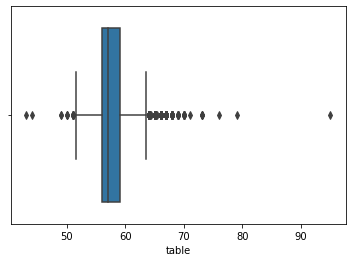

In [4]:
sns.boxplot(dfd);
#grafikte sağ ve solda tek gözüken değerler aykırı değerlerdir.
#grafikte gösterilen çizgiler aşağıda bulduğumu alte ve üste değerlerine eşittir

In [5]:
q1 = dfd.quantile(0.25)#yüzde 25. değerini alır

In [6]:
q3 = dfd.quantile(0.75)

In [7]:
ıqr = 1.5*(q3-q1)

In [8]:
üste = q3+ıqr
üste

63.5

In [9]:
alte = q1-ıqr
alte

51.5

In [10]:
(dfd < alte) | (dfd > üste)

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [11]:
aykırı = (dfd < alte) | (dfd > üste)
aykırı.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [12]:
aykırı_değerler = dfd[aykırı]
#[] içine true-false arrayi yazılırsa sadece true olan değerler döner
aykırı_değerler.head()

2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64

In [13]:
dfd[aykırı].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

Aykırı Değer Sorununun Çözümleri

In [14]:
#silme
import pandas as pd

In [15]:
dfd = pd.DataFrame(dfd)
dfd.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [16]:
dfd.shape

(53940, 1)

In [17]:
dfd[~aykırı].head()
#~(tilda) işareti tam tersini almasını yani truelar yerine falseları almasını sağlar

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0


In [18]:
aykırıdeğil = (dfd > alte) & (dfd < üste)
t_df = dfd[aykırıdeğil].dropna()
t_df.head()#t_df aykırı değerlerin silinmiş hali oldu

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0


In [19]:
t_df.shape

(53334, 1)

In [20]:
#ortalama ile doldurma

In [21]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()#eksik gözlemleri siler
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [22]:
dfd = df.table
dfd.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [23]:
dfd.mean()

57.45718390804603

In [24]:
dfd[aykırı] = dfd.mean()#hata görmezden gelinebilir

C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
dfd[aykırı].head()

2      57.457184
91     57.457184
145    57.457184
219    57.457184
227    57.457184
Name: table, dtype: float64

In [26]:
#baskılama yöntemi(verinin ne kadar yukarı veya aşağı yönlü olduğuna göre kullanılabilir)
#üstteki aykırı değerleri üst eşik değerine alttakileri alt eşik değerine eşitlemektir.
#çok üstteki veya alttaki değerleri uzak olan ortalama yerine daha az uzak olan eşik değerlerine eşitlemektir

In [27]:
df = diamond.copy()
dfd = df.table
dfd.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [28]:
üstaykırı = (dfd > üste)
altaykırı = (dfd < alte)

In [29]:
dfd[altaykırı] = alte
dfd[üstaykırı] = üste

C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
dfd[altaykırı]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [31]:
dfd[üstaykırı]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
239      63.5
296      63.5
314      63.5
356      63.5
359      63.5
461      63.5
504      63.5
526      63.5
712      63.5
771      63.5
777      63.5
868      63.5
919      63.5
929      63.5
932      63.5
1140     63.5
1196     63.5
1227     63.5
1275     63.5
1319     63.5
1422     63.5
1493     63.5
1498     63.5
1524     63.5
1552     63.5
         ... 
52136    63.5
52166    63.5
52167    63.5
52176    63.5
52230    63.5
52282    63.5
52393    63.5
52474    63.5
52583    63.5
52675    63.5
52731    63.5
52748    63.5
52825    63.5
52860    63.5
52861    63.5
52865    63.5
52869    63.5
52916    63.5
53064    63.5
53154    63.5
53226    63.5
53503    63.5
53542    63.5
53577    63.5
53660    63.5
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 589, dtype: float64

Çok Değişkenli Aykırı Gözlem Analizi(İleri Düzey Bir İşlem)

In [59]:
##silme yöntemi
df = diamond.copy().dropna()
df = df.select_dtypes(include = ["float64","int64"])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [47]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [48]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [49]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [50]:
dfscores = clf.negative_outlier_factor_ #burda her değişken için bir LOF skoru oluşturduk

In [51]:
dfscores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [53]:
np.sort(dfscores)[0:20]#önce sıralayıp sonra ilk değerlere bakmalısın

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [54]:
esik_deger = np.sort(dfscores)[13]
#normalde skorlar incelenip ona göre bir eşik değer seçilmelidir

In [55]:
aykırıdeğil = dfscores > esik_deger

In [56]:
yenidf = df[aykırıdeğil]

In [58]:
yenidf

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
6,0.24,62.3,57.0,336,3.95,3.98,2.47
7,0.26,61.9,55.0,337,4.07,4.11,2.53
8,0.22,65.1,61.0,337,3.87,3.78,2.49
9,0.23,59.4,61.0,338,4.00,4.05,2.39


In [78]:
#baskılama yöntemi
baskideğeri = df[dfscores == esik_deger]
aykırılar = df[~aykırıdeğil]
aykırılar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [79]:
res = aykırılar.to_records(index = False)#aykırıların sadece değerlerini aldık
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [80]:
res[:] = baskideğeri.to_records(index = False)
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [81]:
aykırılar = pd.DataFrame(res,index = aykırılar.index)
aykırılar

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


In [82]:
df[~aykırıdeğil] = aykırılar

In [83]:
df[~aykırıdeğil]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
